# Machines de Turing

## Qu'est-ce qu'une machine de Turing ?

Les machines de Turing sont des modèles abstraits de mécanisation/automatisation du calcul introduits par Alan Turing dans son article publié en 1936 *On Computable Numbers, with an Application to the Entscheidungsproblem*. Ces modèles servent encore de nos jours dans les domaines de la théorie de la calculabilité et de la décidabilité, ainsi de la théorie de la complexité.

Il existe de nombreuses variantes de machines de Turing, la plupart étant équivalentes du point de vue de ce qu'elles permettent ou non d'accomplir. Voici celles considérées dans ce document.

Une machine de Turing est essentiellement constituée de trois parties :

1. un ruban infini dans les deux sens divisé en cases, chaque case pouvant contenir un symbole ;
2. une tête de lecture/écriture capable de lire le symbole contenu dans une case et d'en écrire un autre, et de se déplacer d'une case vers la gauche ou vers la droite ;
3. une unité de contrôle ayant un nombre fini d'états.

<img src="tikz_machine_turing.png" width="25%" alt="Machine de Turing : schéma général"/>

**Le ruban**

* cases numérotées par les entiers de $\mathbb{Z}$, la case numéro 0 étant celle sur laquelle pointe initialement la tête de lecture.
* cases contenant les symboles d'un alphabet fini $\Gamma$. L'un des symboles a un rôle particulier : il est considéré comme symbole blanc, qui sera noté $\diamond$ dans la suite.

  Initialement sur le ruban un nombre fini de cases sont occupées par un symbole autre que le symbole blanc. Et à chaque étape le ruban peut donc être décrit sous la forme
  $$ ^\omega\diamond u\diamond^\omega$$
  avec
  
  * $u\in\Gamma^*$ est un mot fini sur l'alphabet $\Gamma$ ;
  * $^\omega\diamond$ signifie que toutes les cases à gauche de $u$ contiennent le symbole blanc $\diamond$ ;
  * $\diamond^\omega$ signifie que toutes les cases à droite de $u$ contiennent le symbole blanc $\diamond$.

**La tête de lecture/écriture**

* elle lit le symbole contenu dans la case qu'elle examine ;
* elle écrit un symbole dans cette même case ;
* elle se déplace vers la case immédiatement à gauche ou à droite.

On note dans la suite par $D$ le déplacement de la tête vers la case voisine droite, et $G$ celui vers la voisine gauche.

**L'unité de contrôle**

C'est l'unité de contrôle qui commande les actions de la tête de lecture/écriture. Elle ne peut avoir qu'un nombre fini d'états, et les actions qu'elle commande à la tête de lecture dépendent de l'état courant de l'unité et du symbole lu par la tête de lecture. Selon l'état courant et le symbole lu, l'action commandée comprend trois éléments :

* le symbole à écrire dans la case du ruban pointée par la tête ;
* le déplacement que la tête doit effectuer : un pas vers la gauche ou vers la droite ;
* l'état dans lequel se place l'unité.

En notant $\mathcal{Q}$ l'ensemble (fini) des états possibles de l'unité, et $\Gamma$ l'alphabet (fini) des symboles pouvant figurer sur le ruban, le fonctionnement d'une unité de contrôle peut être décrit par une fonction partielle $T$ nommée *fonction de transitions* :

$$ T~:~ \mathcal{Q}\times\Gamma \rightarrow \Gamma\times\{D, G\}\times \left(\mathcal{Q}\cup\{STOP\}\right).$$

Lorsque pour un état $q\in\mathcal{Q}$ et un symbole $x\in\Gamma$, on a $T(q, x) = (y, m, q')$, avec $m=D\mbox{ ou }G$, cela signifie que depuis la configuration où l'unité est dans l'état $q$ et le symbole lu par la tête de lecture est $x$, la tête de lecture/écriture doit écrire le symbole $y$ en lieu et place du symbole $x$, cette tête doit se déplacer vers la case voisine droite (resp. gauche) si $m=D$ (resp. $m=G$), et l'unité passe dans l'état $q'$.

La fonction $T$ peut être partiellement définie. Si pour une configuration $(q,x)$ la fonction $T$ n'est pas définie ($T(q, x) = \bot$) alors la tête de lecture/écriture n'inscrit rien sur le ruban, ne se déplace pas, l'unité de contrôle reste dans l'état $q$ et la machine s'arrête. 

Si pour une configuration donnée on a $T(q, x) = (y, m, STOP)$, alors la tête de lecture/écriture écrit le symbole $y$ dans la case courante, effectue le mouvement $m$ et l'unité passe dans un état spécial $STOP$, depuis lequel aucune nouvelle transition n'est possible : la machine s'arrête.


Comme les ensembles d'états $\mathcal{Q}$ et de symboles $\Gamma$ sont finis, une fonction de transitions peut toujours être décrite 

* par une table, nommée *table de transitions* ;
* ou par un graphe orienté, nommé *graphe de transitions*, dont les sommets sont les états. Un arc reliant un sommet $q$ à un sommet $q'$, étiqueté par un triplet $(x, y, m)$ signifie que $T(q, x) = (y, m, q')$. 

Considérons l'exemple d'une machine de Turing à quatre états, $\mathcal{Q}=\{q_a, q_b, q_c, q_d\}$ utilisant un alphabet à trois symboles $\Gamma = \{\mathtt{ESP}, \mathtt{0}, \mathtt{1}\}$, $\mathtt{ESP}$ jouant le rôle du symbole blanc. La fonction de transitions $T$ de cette machine peut être décrit par la table de transitions ci-dessous.
  $$
\begin{array}{|c||c|c|c|}
\hline
   & \mathtt{0} & \mathtt{1} & \mathtt{ESP}\\
\hline
\hline
  q_a  & \mathtt{0}, D, q_b & \mathtt{1}, D, q_a & \mathtt{1}, G, q_c \\
\hline
  q_b  & \mathtt{0}, D, STOP & \mathtt{1}, D, q_a & \mathtt{1}, G, q_c \\
\hline
  q_c  & \mathtt{0}, G, q_d & \mathtt{1}, G, q_c  & \mathtt{1}, D, q_a \\
\hline
  q_d  & \mathtt{0}, D, STOP & \mathtt{1}, G, q_c  & \mathtt{1}, D, q_a \\
\hline
\end{array}
  $$
  
  Cette table montre par exemple que $T(q_b, \mathtt{1}) = (\mathtt{1}, D, q_a)$. De plus on peut constater que $T(q,x)$ est défini pour tout couple d'état et symbole $(q,x)$.

  La fonction de transitions peut aussi être figurée par un graphe de transitions.
<img src="tikz_unite_controle2.png" alt="MT : unité de contrôle"/>

**Configuration**

Une configuration d'une machine de Turing est entièrement déterminé par l'état courant de cette machine et du symbole que lit la tête de lecture. Si pour cette configuration, la fonction de transitions est définie, cela met la machine dans une nouvelle configuration, et cette configuration dépend du contenu de la nouvelle case examinée par la tête de lecture. Les configurations successives dépendent donc du contenu du ruban.

On peut noter une *configuration complète* $C$, c'est-à-dire la configuration (état, symbole lu), le ruban et la position de la tête de lecture/écriture 
$$ C =\, ^\omega\diamond u(q x)v\diamond^\omega, $$
qui montre que 
* le ruban contient $^\omega\diamond uxv\diamond^\omega$, $x$ étant un symbole de $\Gamma$, $u$ et $v$ deux mots de $\Gamma^*$ ;
* l'unité de contrôle est dans l'état $q$ ;
* et la tête de lecture pointe sur la case contenant le symbole $x$.

À partir d'une configuration donnée $C =\, ^\omega\diamond u(q x)v\diamond^\omega$, 

* si $T(q, x) = (y, D, q')$ et $v=x'v'$ alors la configuration obtenue est $C' =\, ^\omega\diamond uy(q' x')v'\diamond^\omega$ ;
* si $T(q, x) = (y, D, q')$ et $v$ est le mot vide alors la configuration obtenue est $C' =\, ^\omega\diamond uy(q' \diamond)\diamond^\omega$ ;
* si $T(q, x) = (y, G, q')$ et $u=u'x'$ alors la configuration obtenue est $C' =\, ^\omega\diamond u'(q' x')yv\diamond^\omega$ ;
* si $T(q, x) = (y, G, q')$ et $u$ est le mot vide alors la configuration obtenue est $C' =\, ^\omega\diamond(q' b)yv\diamond^\omega$ ;
* si $T(q, x)$ n'est pas défini, il n'y a pas de configuration suivante. La machine s'arrête.

On note $C \rightarrow C'$ la transition d'une configuration $C$ à une configuration $C'$.



**Calcul**

On appelle *calcul* effectué par une machine de Turing, une suite de configurations $(C_n)$ telle que  

* $C_0$ est la configuration initiale déterminée par le ruban, l'état initial et la position de la tête de lecture/écriture ;
* et pour tout entier $n\geq 0$, $C_{n} \rightarrow C_{n+1}$. 

Voici un exemple de calcul réalisé par la machine de Turing à quatre états donnée en exemple ci-dessus, depuis la configuration $^\omega\diamond(q_a\, \mathtt{1})\mathtt{001}\diamond^\omega$ (dans laquelle le caractère blanc est $\diamond=\mathtt{ESP}$).

\begin{align}
   ^\omega\diamond(q_a\, \mathtt{1})\mathtt{001}\diamond^\omega 
           &\rightarrow \, ^\omega\diamond\mathtt{1}(q_a\, \mathtt{0})\mathtt{01}\diamond^\omega\\
           &\rightarrow \, ^\omega\diamond\mathtt{10}(q_b\, \mathtt{0})\mathtt{1}\diamond^\omega\\
           &\rightarrow \, ^\omega\diamond\mathtt{100}(STOP\, \mathtt{1})\diamond^\omega\\
\end{align}
Ce calcul se termine par l'arrivée de la machine dans l'état $STOP$.

Voici un deuxième exemple de calcul un peu plus long durant lequel la machine passe par chacun de ses quatre états pour arriver finalement à l'état $STOP$.

\begin{align}
   ^\omega\diamond\mathtt{100}(q_a\, \mathtt{1})\mathtt{0}\diamond\mathtt{1}\diamond^\omega 
           &\rightarrow \, ^\omega\diamond\mathtt{1001}(q_a\, \mathtt{0})\diamond\mathtt{1}\diamond^\omega\\
           &\rightarrow \, ^\omega\diamond\mathtt{10010}(q_b\, \diamond)\mathtt{1}\diamond^\omega\\
           &\rightarrow \, ^\omega\diamond\mathtt{1001}(q_c\, \mathtt{0})\mathtt{11}\diamond^\omega\\
           &\rightarrow \, ^\omega\diamond\mathtt{100}(q_d\, \mathtt{1})\mathtt{011}\diamond^\omega\\
           &\rightarrow \, ^\omega\diamond\mathtt{10}(q_c\, \mathtt{0})\mathtt{1011}\diamond^\omega\\
           &\rightarrow \, ^\omega\diamond\mathtt{1}(q_d\, \mathtt{0})\mathtt{01011}\diamond^\omega\\
           &\rightarrow \, ^\omega\diamond\mathtt{10}(STOP\, \mathtt{0})\mathtt{1011}\diamond^\omega\\           
\end{align}

Enfin voici une dernière configuration depuis laquelle le calcul ne s'arrête jamais.

\begin{align}
   ^\omega\diamond(q_a\, \mathtt{1})\mathtt{0}\diamond\mathtt{01}\diamond^\omega 
           &\rightarrow \, ^\omega\diamond\mathtt{1}(q_a\, \mathtt{0})\diamond\mathtt{01}\diamond^\omega\\
           &\rightarrow \, ^\omega\diamond\mathtt{10}(q_b\, \diamond)\mathtt{01}\diamond^\omega\\
           &\rightarrow \, ^\omega\diamond\mathtt{1}(q_c\, \mathtt{0})\mathtt{101}\diamond^\omega\\
           &\rightarrow \, ^\omega\diamond(q_d\, \mathtt{1})\mathtt{0101}\diamond^\omega\\
           &\rightarrow \, ^\omega\diamond(q_c\, b)\mathtt{10101}\diamond^\omega\\
           &\rightarrow \, ^\omega\diamond\mathtt{1}(q_a\, \mathtt{1})\mathtt{0101}\diamond^\omega\\
           &\rightarrow \ldots
\end{align}


## Une classe pour les machines de Turing

Le module [`turing_machine`](turing_machine.py) définit une classe permettant de créer des machines de Turing.

In [1]:
from turing_machine import TuringMachine

Pour créer une machine de Turing, il suffit de préciser la table de transitions sous forme d'un dictionnaire, dont les clés sont les configurations envisagées sous forme de couple (état courant, symbole lu) et les valeurs associées sont des triplets de la forme (symbole écrit, déplacement, état atteint).

Les états peuvent être décrits par n'importe quelle chaîne de caractères. Par défaut l'état initial est `'A'`.

Les symboles lus/écrits sur le ruban peuvent être n'importe quel caractère (chaîne de caractères de longueur 1). Par défaut le symbole blanc est représenté par le caractère espace (`' '`).

Les déplacements de la tête de lecture/écriture sont représentés par l'un des entiers 0, 1 ou -1. Si le déplacement est positif, cela indique un déplacement de la tête vers la droite du ruban, s'il est négatif, vers la gauche, et s'il est nul la tête ne se déplace pas (cette possibilité d'immobilité de la tête lors d'une transition n'est pas indispensable, car elle peut toujours être simulée).

Voici la définition de la machine de Turing à quatre états. L'alphabet du ruban n'utilise que les symboles $\mathtt{ESP}$ (symbole blanc par défaut), $\mathtt{0}$ et $\mathtt{1}$.

In [2]:
tm = TuringMachine({
    ('A', '0') : ('0', 1, 'B'), 
    ('A', '1') : ('1', 1, 'A'), 
    ('A', ' ') : ('1', -1, 'C'),
    ('B', '0') : ('0', 1, 'STOP'),
    ('B', '1') : ('1', 1, 'A'), 
    ('B', ' ') : ('1', -1, 'C'),
    ('C', '0') : ('0', -1, 'D'), 
    ('C', '1') : ('1', -1, 'C'), 
    ('C', ' ') : ('1', 1, 'A'),
    ('D', '0') : ('0', 1, 'STOP'),
    ('D', '1') : ('1', -1, 'C'), 
    ('D', ' ') : ('1', 1, 'A')    
})

La méthode `get_state` donne l'état courant de la machine. 

In [3]:
tm.get_state()

'A'

On obtient `'A'` parce que c'est l'état initial par défaut et que la machine n'a pas encore travaillé.

La méthode `get_tape` donne le ruban courant. C'est un objet de la classe `Tape` qui peut être imprimé partiellement.

In [4]:
print(tm.get_tape())

...| | | | | | | | | | | | | | | | | | | | > < | | | | | | | | | | | | | | | | | | | | | | | | | | | | |...


La portion de ruban imprimée ici ne montre que des cases vides qui contiennent en fait toutes le symbole blanc par défaut : l'espace. 

Les cases du ruban sont implicitement numérotées par les entiers. La vue partielle par défaut donne une vue sur les cinquante cases indexées de -20 à 29. 

On peut lancer l'exécution d'une machine de Turing avec la méthode `run` en lui transmettant le mot initial sur le ruban qui y est inscrit à partir de la case d'indice 0.

In [5]:
tm.run(tape='10 0100')

  0 : A            0 : ...| | | | | | | | | | | | | | | | | | | | >1<0| |0|1|0|0| | | | | | | | | | | | | | | | | | | | | | | |...
  1 : A            1 : ...| | | | | | | | | | | | | | | | | | | | |1>0< |0|1|0|0| | | | | | | | | | | | | | | | | | | | | | | |...
  2 : B            2 : ...| | | | | | | | | | | | | | | | | | | | |1|0> <0|1|0|0| | | | | | | | | | | | | | | | | | | | | | | |...
  3 : C            1 : ...| | | | | | | | | | | | | | | | | | | | |1>0<1|0|1|0|0| | | | | | | | | | | | | | | | | | | | | | | |...
  4 : D            0 : ...| | | | | | | | | | | | | | | | | | | | >1<0|1|0|1|0|0| | | | | | | | | | | | | | | | | | | | | | | |...
  5 : C           -1 : ...| | | | | | | | | | | | | | | | | | | > <1|0|1|0|1|0|0| | | | | | | | | | | | | | | | | | | | | | | |...
  6 : A            0 : ...| | | | | | | | | | | | | | | | | | | |1>1<0|1|0|1|0|0| | | | | | | | | | | | | | | | | | | | | | | |...
  7 : A            1 : ...| | | | | | | | | | | | | | | | | | | |1|1>0<1|0|1|0|0| |

La méthode `run` imprime sur la sortie standard une ligne par étape de calcul. 
Sur chacune des lignes figurent

* le numéro de l'étape de calcul (0 = situation initiale),
* l'état atteint à la fin de cette étape,
* l'indice de la case pointée par la tête de lecture/écriture,
* et une vue partielle du ruban.

La méthode `get_nb_steps` donne le nombre d'étapes de calculs effectuées.

In [6]:
tm.get_nb_steps()

13

On peut lancer l'exécution d'une machine de Turing sans visualisation des différentes étapes. Il suffit de donner la valeur `False` au paramètre `verbose`.

In [7]:
tm.run(tape='11 00110', verbose=False)

In [8]:
print(tm.get_nb_steps(), tm.get_state(), tm.get_tape())

11 STOP ...| | | | | | | | | | | | | | | | | | | |1>1<1|1|0|0|1|1|0| | | | | | | | | | | | | | | | | | | | | | |...


On peut aussi limiter le nombre d'étapes du calcul effectué par une machine de Turing avec le paramètre optionnel `max_step`. C'est bien utile pour les calculs sans fin.

In [9]:
tm.run(tape='110 0110', max_step=30)

  0 : A            0 : ...| | | | | | | | | | | | | | | | | | | | >1<1|0| |0|1|1|0| | | | | | | | | | | | | | | | | | | | | | |...
  1 : A            1 : ...| | | | | | | | | | | | | | | | | | | | |1>1<0| |0|1|1|0| | | | | | | | | | | | | | | | | | | | | | |...
  2 : A            2 : ...| | | | | | | | | | | | | | | | | | | | |1|1>0< |0|1|1|0| | | | | | | | | | | | | | | | | | | | | | |...
  3 : B            3 : ...| | | | | | | | | | | | | | | | | | | | |1|1|0> <0|1|1|0| | | | | | | | | | | | | | | | | | | | | | |...
  4 : C            2 : ...| | | | | | | | | | | | | | | | | | | | |1|1>0<1|0|1|1|0| | | | | | | | | | | | | | | | | | | | | | |...
  5 : D            1 : ...| | | | | | | | | | | | | | | | | | | | |1>1<0|1|0|1|1|0| | | | | | | | | | | | | | | | | | | | | | |...
  6 : C            0 : ...| | | | | | | | | | | | | | | | | | | | >1<1|0|1|0|1|1|0| | | | | | | | | | | | | | | | | | | | | | |...
  7 : C           -1 : ...| | | | | | | | | | | | | | | | | | | > <1|1|0|1|0|1|1|0|

### Visualiser le graphe de transition

La méthode `to_dot` renvoie une description au format dot du graphe de transitions d'une machine de Turing. Elle prend un paramètre optionnel donnant la couleur de fond (`background_color`).

In [10]:
print(tm.to_dot(background_color='#FFFF88'))


digraph {
	bgcolor="#FFFF88";
	rankdir=LR;

	 /* les noeuds */      
	node [shape=point, color=white, fontcolor=white];
	start;
	node [shape=circle, color=black, fontcolor=black];

	 /* les arcs */
	STOP;C;B;D;A
	start -> A [label="start"];
	A -> C[label="ESP,1,G"];
	A -> B[label="0,0,D"];
	A -> A[label="1,1,D"];
	B -> A[label="1,1,D"];
	C -> C[label="1,1,G"];
	C -> D[label="0,0,G"];
	D -> STOP[label="0,0,D"];
	D -> A[label="ESP,1,D"];
	B -> STOP[label="0,0,D"];
	B -> C[label="ESP,1,G"];
	C -> A[label="ESP,1,D"];
	D -> C[label="1,1,G"];
}


Avec le module `graphviz` et la fonction `display` offerte par les calepins, on peut avoir un rendu graphique.

In [11]:
import graphviz

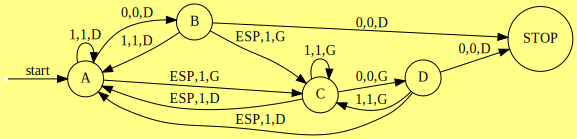

In [12]:
display(graphviz.Source(tm.to_dot(background_color='#FFFF88')))

La méthode `show_transition_graph` permet de visualiser en dehors des calepins. Elle prend deux paramètres optionnels : `background_color` pour la couleur du fond, et `filename` pour le nom du fichier qui accueillera la description au format dot.

In [13]:
tm.show_transition_graph(background_color='#FF77FF', filename='tm1')

### Configuration complète en $\LaTeX$

La méthode `to_latex` donne une description en $\LaTeX$ de la configuration complète de la machine de Turing.

In [14]:
tm.to_latex()

'\\,^\\omega\\diamond \\mathtt{1}\\mathtt{1}\\mathtt{1}\\mathtt{1}(A\\,\\mathtt{0})\\mathtt{1}\\mathtt{0}\\mathtt{1}\\mathtt{1}\\mathtt{0}\\mathtt{1}\\diamond^\\omega'

Et dans un calepin Jupyter, on peut avoir le rendu offert par $\LaTeX$ de cette description.

In [15]:
from IPython.display import Latex

In [16]:
Latex('${:s}$'.format(tm.to_latex()))

<IPython.core.display.Latex object>

# Quelques machines

## Machines de Turing pour calculer

Les premiers exemples de machine listés ci-dessous concernent des problèmes de calcul dans le sens où, à partir d'une ou plusieurs données, la machine doit produire un résultat.

### Incrémenter

La machine à deux états travaillant avec l'alphabet $\Gamma =\{\mathtt{0}, \mathtt{1}, \mathtt{ESP}\}$ définie par la table de transitions ci-dessous est une MT qui à partir d'un ruban contenant l'écriture binaire d'un entier $n$, la tête de lecture étant placée sur l'un des bits de cette écriture binaire, modifie ce ruban de sorte que, une fois arrêtée, on puisse y lire l'écriture binaire de $n+1$. Autrement dit cette MT « incrémente » l'entier $n$.

$$
\begin{array}{|c|c|c|c|}
\hline
  & \mathtt{0} & \mathtt{1} & \mathtt{ESP} \\
\hline
  A & \mathtt{O}, D, A & \mathtt{1}, D, A & \mathtt{ESP}, G, B \\
\hline
  B & \mathtt{1}, D, \mathtt{STOP} & \mathtt{0}, G, B & \mathtt{1}, D, \mathtt{STOP} \\
\hline
\end{array}
$$

In [17]:
incrementer = TuringMachine({
    ('A', '0') : ('0', 1, 'A'),
    ('A', '1') : ('1', 1, 'A'),
    ('A', ' ') : (' ', -1, 'B'),
    ('B', '0') : ('1', 1, 'STOP'),
    ('B', '1') : ('0', -1, 'B'),
    ('B', ' ') : ('1', 1, 'STOP')
})

Voici l'incrémentation du nombre 4 (`'100'`).

In [18]:
incrementer.run(tape='100')

  0 : A            0 : ...| | | | | | | | | | | | | | | | | | | | >1<0|0| | | | | | | | | | | | | | | | | | | | | | | | | | | |...
  1 : A            1 : ...| | | | | | | | | | | | | | | | | | | | |1>0<0| | | | | | | | | | | | | | | | | | | | | | | | | | | |...
  2 : A            2 : ...| | | | | | | | | | | | | | | | | | | | |1|0>0< | | | | | | | | | | | | | | | | | | | | | | | | | | |...
  3 : A            3 : ...| | | | | | | | | | | | | | | | | | | | |1|0|0> < | | | | | | | | | | | | | | | | | | | | | | | | | |...
  4 : B            2 : ...| | | | | | | | | | | | | | | | | | | | |1|0>0< | | | | | | | | | | | | | | | | | | | | | | | | | | |...
  5 : STOP         3 : ...| | | | | | | | | | | | | | | | | | | | |1|0|1> < | | | | | | | | | | | | | | | | | | | | | | | | | |...


Autres exemples.

In [19]:
n = 15
incrementer.run(tape='{:b}'.format(n))

  0 : A            0 : ...| | | | | | | | | | | | | | | | | | | | >1<1|1|1| | | | | | | | | | | | | | | | | | | | | | | | | | |...
  1 : A            1 : ...| | | | | | | | | | | | | | | | | | | | |1>1<1|1| | | | | | | | | | | | | | | | | | | | | | | | | | |...
  2 : A            2 : ...| | | | | | | | | | | | | | | | | | | | |1|1>1<1| | | | | | | | | | | | | | | | | | | | | | | | | | |...
  3 : A            3 : ...| | | | | | | | | | | | | | | | | | | | |1|1|1>1< | | | | | | | | | | | | | | | | | | | | | | | | | |...
  4 : A            4 : ...| | | | | | | | | | | | | | | | | | | | |1|1|1|1> < | | | | | | | | | | | | | | | | | | | | | | | | |...
  5 : B            3 : ...| | | | | | | | | | | | | | | | | | | | |1|1|1>1< | | | | | | | | | | | | | | | | | | | | | | | | | |...
  6 : B            2 : ...| | | | | | | | | | | | | | | | | | | | |1|1>1<0| | | | | | | | | | | | | | | | | | | | | | | | | | |...
  7 : B            1 : ...| | | | | | | | | | | | | | | | | | | | |1>1<0|0| | | | |

### Décrémenter

La machine suivante « décrémente » l'entier $n$ représenté initialement en binaire sur le ruban.

In [20]:
decrementer = TuringMachine({
    ('A', '0') : ('0', 1, 'A'),
    ('A', '1') : ('1', 1, 'A'),
    ('A', ' ') : (' ', -1, 'B'),
    ('B', '0') : ('1', -1, 'B'),
    ('B', '1') : ('0', 0, 'STOP'),
    ('B', ' ') : ('1', -1, 'B')
})

On décrémente 11 (`1011`).

In [21]:
decrementer.run(tape='1011')

  0 : A            0 : ...| | | | | | | | | | | | | | | | | | | | >1<0|1|1| | | | | | | | | | | | | | | | | | | | | | | | | | |...
  1 : A            1 : ...| | | | | | | | | | | | | | | | | | | | |1>0<1|1| | | | | | | | | | | | | | | | | | | | | | | | | | |...
  2 : A            2 : ...| | | | | | | | | | | | | | | | | | | | |1|0>1<1| | | | | | | | | | | | | | | | | | | | | | | | | | |...
  3 : A            3 : ...| | | | | | | | | | | | | | | | | | | | |1|0|1>1< | | | | | | | | | | | | | | | | | | | | | | | | | |...
  4 : A            4 : ...| | | | | | | | | | | | | | | | | | | | |1|0|1|1> < | | | | | | | | | | | | | | | | | | | | | | | | |...
  5 : B            3 : ...| | | | | | | | | | | | | | | | | | | | |1|0|1>1< | | | | | | | | | | | | | | | | | | | | | | | | | |...
  6 : STOP         3 : ...| | | | | | | | | | | | | | | | | | | | |1|0|1>0< | | | | | | | | | | | | | | | | | | | | | | | | | |...


Autres exemples.

In [22]:
n = 8
decrementer.run(tape='{:b}'.format(n))

  0 : A            0 : ...| | | | | | | | | | | | | | | | | | | | >1<0|0|0| | | | | | | | | | | | | | | | | | | | | | | | | | |...
  1 : A            1 : ...| | | | | | | | | | | | | | | | | | | | |1>0<0|0| | | | | | | | | | | | | | | | | | | | | | | | | | |...
  2 : A            2 : ...| | | | | | | | | | | | | | | | | | | | |1|0>0<0| | | | | | | | | | | | | | | | | | | | | | | | | | |...
  3 : A            3 : ...| | | | | | | | | | | | | | | | | | | | |1|0|0>0< | | | | | | | | | | | | | | | | | | | | | | | | | |...
  4 : A            4 : ...| | | | | | | | | | | | | | | | | | | | |1|0|0|0> < | | | | | | | | | | | | | | | | | | | | | | | | |...
  5 : B            3 : ...| | | | | | | | | | | | | | | | | | | | |1|0|0>0< | | | | | | | | | | | | | | | | | | | | | | | | | |...
  6 : B            2 : ...| | | | | | | | | | | | | | | | | | | | |1|0>0<1| | | | | | | | | | | | | | | | | | | | | | | | | | |...
  7 : B            1 : ...| | | | | | | | | | | | | | | | | | | | |1>0<1|1| | | | |

### Additionner

Voici une machine qui « additionne » deux entiers représentés en binaire sur le ruban.

In [23]:
additionner = TuringMachine({
    ('A', '0') : ('0', 1, 'A'),
    ('A', '1') : ('1', 1, 'A'),
    ('A', ' ') : (' ', 1, 'Snd'),
    ('Snd', '0') : ('0', 1, 'Snd'),
    ('Snd', '1') : ('1', 1, 'NonNul'),
    ('Snd', ' ') : (' ', -1, 'Efface'),
    ('NonNul', '0') : ('0', 1, 'NonNul'),
    ('NonNul', '1') : ('1', 1, 'NonNul'),
    ('NonNul', ' ') : (' ', -1, 'Decr'),
    ('Efface', '0') : (' ', -1, 'Efface'),
    ('Efface', ' ') : (' ', 0, 'STOP'),
    ('Decr', '0') : ('1', -1, 'Decr'),
    ('Decr', '1') : ('0', -1, 'B'),
    ('B', '0') : ('0', -1, 'B'),
    ('B', '1') : ('1', -1, 'B'),
    ('B', ' ') : (' ', -1, 'Incr'),
    ('Incr', '0') : ('1', 0, 'A'),
    ('Incr', '1') : ('0', -1, 'Incr'),
    ('Incr', ' ') : ('1', 0, 'A')
})

On additionne 7 (`'111'`) et 5 (`'101`). 

In [24]:
additionner.run('111 101')

  0 : A            0 : ...| | | | | | | | | | | | | | | | | | | | >1<1|1| |1|0|1| | | | | | | | | | | | | | | | | | | | | | | |...
  1 : A            1 : ...| | | | | | | | | | | | | | | | | | | | |1>1<1| |1|0|1| | | | | | | | | | | | | | | | | | | | | | | |...
  2 : A            2 : ...| | | | | | | | | | | | | | | | | | | | |1|1>1< |1|0|1| | | | | | | | | | | | | | | | | | | | | | | |...
  3 : A            3 : ...| | | | | | | | | | | | | | | | | | | | |1|1|1> <1|0|1| | | | | | | | | | | | | | | | | | | | | | | |...
  4 : Snd          4 : ...| | | | | | | | | | | | | | | | | | | | |1|1|1| >1<0|1| | | | | | | | | | | | | | | | | | | | | | | |...
  5 : NonNul       5 : ...| | | | | | | | | | | | | | | | | | | | |1|1|1| |1>0<1| | | | | | | | | | | | | | | | | | | | | | | |...
  6 : NonNul       6 : ...| | | | | | | | | | | | | | | | | | | | |1|1|1| |1|0>1< | | | | | | | | | | | | | | | | | | | | | | |...
  7 : NonNul       7 : ...| | | | | | | | | | | | | | | | | | | | |1|1|1| |1|0|1> <

Sans surprise on obtient 12 (`'1100'`).

Autres exemples :

In [25]:
n, m = 29, 15
additionner.run('{:b} {:b}'.format(n, m), verbose=False)
print(additionner.get_nb_steps(), additionner.get_tape())

243 ...| | | | | | | | | | | | | | | | | | | |1>0<1|1|0|0| | | | | | | | | | | | | | | | | | | | | | | | | |...


### Conversion unaire -> binaire

La machine suivante est une MT qui à partir d'un nombre entier $n$ écrit en unaire sur le ruban par une répétition de $n$ fois le symbole `1`, la tête de lecture étant située initialement sur le `1` le plus à gauche, écrit sur le ruban l'entier $n$ en binaire. 

In [26]:
unaire2binaire = TuringMachine({
    ('Intro1', '1') : ('1', -1, 'Intro1'),
    ('Intro1', ' ') : ('0', 1, 'Intro2'),
    ('Intro2', '1') : ('1', 1, 'Intro2'),
    ('Intro2', ' ') : (' ', 1, 'Intro3'),
    ('Intro3', ' ') : ('0', -1, 'Efface'),
    ('Efface', ' ') : (' ', -1, 'Efface'),
    ('Efface', '0') : (' ', 1, 'STOP'),
    ('Efface', '1') : (' ', 1, 'Incr1'),
    ('Incr1', ' ') : (' ', 1, 'Incr1'),
    ('Incr1', '0') : ('0', 1, 'Incr2'),
    ('Incr1', '1') : ('1', 1, 'Incr2'),
    ('Incr2', ' ') : (' ', -1, 'Incr3'),
    ('Incr2', '0') : ('0', 1, 'Incr2'),
    ('Incr2', '1') : ('1', 1, 'Incr2'),
    ('Incr3', '0') : ('1', -1, 'Incr4'),
    ('Incr3', '1') : ('0', -1, 'Incr3'),
    ('Incr3', ' ') : ('1', -1, 'Efface'),
    ('Incr4', '0') : ('0', -1, 'Incr4'),
    ('Incr4', '1') : ('1', -1, 'Incr4'),
    ('Incr4', ' ') : (' ', -1, 'Efface')
})

In [27]:
n = 5
unaire2binaire.run('1'*n, initial_state='Intro1')

  0 : Intro1       0 : ...| | | | | | | | | | | | | | | | | | | | >1<1|1|1|1| | | | | | | | | | | | | | | | | | | | | | | | | |...
  1 : Intro1      -1 : ...| | | | | | | | | | | | | | | | | | | > <1|1|1|1|1| | | | | | | | | | | | | | | | | | | | | | | | | |...
  2 : Intro2       0 : ...| | | | | | | | | | | | | | | | | | | |0>1<1|1|1|1| | | | | | | | | | | | | | | | | | | | | | | | | |...
  3 : Intro2       1 : ...| | | | | | | | | | | | | | | | | | | |0|1>1<1|1|1| | | | | | | | | | | | | | | | | | | | | | | | | |...
  4 : Intro2       2 : ...| | | | | | | | | | | | | | | | | | | |0|1|1>1<1|1| | | | | | | | | | | | | | | | | | | | | | | | | |...
  5 : Intro2       3 : ...| | | | | | | | | | | | | | | | | | | |0|1|1|1>1<1| | | | | | | | | | | | | | | | | | | | | | | | | |...
  6 : Intro2       4 : ...| | | | | | | | | | | | | | | | | | | |0|1|1|1|1>1< | | | | | | | | | | | | | | | | | | | | | | | | |...
  7 : Intro2       5 : ...| | | | | | | | | | | | | | | | | | | |0|1|1|1|1|1> < | |

In [28]:
for n in (10, 20, 28, 30):
    unaire2binaire.run('1'*n, initial_state='Intro1', verbose=False)
    print('{:3d} : {:5d} : {:s}'.format(n, unaire2binaire.get_nb_steps(), str(unaire2binaire.get_tape())))

 10 :   176 : ...| | | | | | | | | | | | | | | | | | | | > < | | | | | | |1|0|1|0| | | | | | | | | | | | | | | | | | |...
 20 :   546 : ...| | | | | | | | | | | | | | | | | | | | > < | | | | | | | | | | | | | | | |1|0|1|0|0| | | | | | | | |...
 28 :   986 : ...| | | | | | | | | | | | | | | | | | | | > < | | | | | | | | | | | | | | | | | | | | | | | |1|1|1|0|0|...
 30 :  1116 : ...| | | | | | | | | | | | | | | | | | | | > < | | | | | | | | | | | | | | | | | | | | | | | | | |1|1|1|...


La dernière ligne affichée par la commande ci-dessus est trompeuse. La vue sur la bande est tronquée, et on ne voit que les trois bits de poids fort de l'écriture binaire de 30.

Mais l'utilisation de la méthode `str` des objets de la classe `Tape` permet de fixer l'indice du début (qui est fixé à -20 par défaut) de la vue sur la bande. 

In [29]:
print(unaire2binaire.get_tape().str(0))

...|> < | | | | | | | | | | | | | | | | | | | | | | | | | |1|1|1|1|0| | | | | | | | | | | | | | | | | | |...


In [30]:
n = 1024
unaire2binaire.run('1'*n, initial_state='Intro1', verbose=False)
print('{:3d} : {:5d} : {:s}'.format(n, unaire2binaire.get_nb_steps(), unaire2binaire.get_tape().str(n - 20)))

1024 : 1055750 : ...| | | | | | | | | | | |1|0|0|0|0|0|0|0|0|0|0| | | | | | | | | | | | | | | | | | | | | | | | | | | | |...


### Une machine de Turing pour la suite de Syracuse

Cette machine de Turing, proposée par Pascal Michel en 2014, considère les nombres entiers écrits en base 3, et utilise pour cela l'alphabet $\Gamma = \{\mathtt{0}, \mathtt{1}, \mathtt{2}, \mathtt{ESP}\}$. Elle a trois états. Elle énumère mes termes successifs de la suite obtenue en itérant la fonction
$$ f(a) = \left\{
\begin{array}{cl}
  \frac{n}{2} & \mbox{si }n\mbox{ est pair}\\
  \frac{3n+1}{2} & \mbox{sinon}
\end{array}
\right.$$
à partir d'un entier initial $n$. Elle inscrit donc les $f(n)$, $f^2(n)$, $f^3(n)$, ... sur le ruban.

En voici la table de transitions.

$$
\begin{array}{|c|c|c|c|c|}
\hline
  \mbox{Collatz} & \mathtt{0} & \mathtt{1} & \mathtt{2} & \mathtt{ESP} \\
\hline
  A & \mathtt{O}, D, A & \mathtt{0}, D, B & \mathtt{1}, D, A & \mathtt{ESP}, G, C \\
\hline
  B & \mathtt{1}, D, B & \mathtt{2}, D, A & \mathtt{2}, D, B & \mathtt{2}, G, C \\
\hline
  C & \mathtt{0}, G, C & \mathtt{1}, G, C & \mathtt{2}, G, C & \mathtt{ESP}, D, A \\
\hline
\end{array}
$$

Cette machine ne s'arrête jamais puisque de toute configuration une transition est toujours possible.
Mais à chaque fois que la machine est dans l'état $A$ et que la position de la tête est sur la case non blanche la plus à gauche, on peut lire sur le ruban un terme de la suite de Syracuse écrit en base 3.

In [31]:
collatz = TuringMachine({
    ('A', '0') : ('0', 1, 'A'),
    ('A', '1') : ('0', 1, 'B'),
    ('A', '2') : ('1', 1, 'A'),
    ('A', ' ') : (' ', -1, 'C'),    
    ('B', '0') : ('1', 1, 'B'),
    ('B', '1') : ('2', 1, 'A'),
    ('B', '2') : ('2', 1, 'B'),
    ('B', ' ') : ('2', -1, 'C'),
    ('C', '0') : ('0', -1, 'C'),
    ('C', '1') : ('1', -1, 'C'),
    ('C', '2') : ('2', -1, 'C'),
    ('C', ' ') : (' ', 1, 'A')    
})

In [32]:
collatz.run(tape='21', max_step=100)

  0 : A            0 : ...| | | | | | | | | | | | | | | | | | | | >2<1| | | | | | | | | | | | | | | | | | | | | | | | | | | | |...
  1 : A            1 : ...| | | | | | | | | | | | | | | | | | | | |1>1< | | | | | | | | | | | | | | | | | | | | | | | | | | | |...
  2 : B            2 : ...| | | | | | | | | | | | | | | | | | | | |1|0> < | | | | | | | | | | | | | | | | | | | | | | | | | | |...
  3 : C            1 : ...| | | | | | | | | | | | | | | | | | | | |1>0<2| | | | | | | | | | | | | | | | | | | | | | | | | | | |...
  4 : C            0 : ...| | | | | | | | | | | | | | | | | | | | >1<0|2| | | | | | | | | | | | | | | | | | | | | | | | | | | |...
  5 : C           -1 : ...| | | | | | | | | | | | | | | | | | | > <1|0|2| | | | | | | | | | | | | | | | | | | | | | | | | | | |...
  6 : A            0 : ...| | | | | | | | | | | | | | | | | | | | >1<0|2| | | | | | | | | | | | | | | | | | | | | | | | | | | |...
  7 : B            1 : ...| | | | | | | | | | | | | | | | | | | | |0>0<2| | | | | |

## Machines de Turing pour décider

Les exemples qui suivent concernent des problèmes de décision : les données du problème satisfont-elles, oui ou non, telle ou telle propriété ?

### Reconnaître les mots d'un langage rationnel

Il n'est pas surprenant qu'une machine de Turing puisse reconnaître les mots d'un langage rationnel puisqu'un simple automate fini n'ayant que des capacités de lecture et de déplacement dans un seul sens est capable de la faire.

À titre d'exemple, considérons le langage rationnel $L = a^*(ba)^*$ des mots construits sur l'alphabet de deux lettres $a$ et $b$, commençant par un nombre quelconque y compris nul de $a$ suivi d'un nombre quelconque y compris nul de facteurs $ba$.

Les mots de ce langage peuvent être reconnus par un automate fini à trois états dont deux états terminaux, représenté dans la figure ci-dessous.

<img src="tikz_automate_fini.png" alt="automate à trois états pour le langage L" />

Cet automate peut être traduit immédiatement en une table de transitions d'une machine à trois états pour laquelle la tête de lecture se déplace uniquement vers la droite et ne fait que réécrire les symboles lus.

En plus des trois états de l'automate, deux états sont introduits : `Accept` état d'acceptation du mot et `Reject` état de refus du mot. Ces deux états sont nécessairement des états d'arrêt de la machine puisqu'aucune transition n'est prévue depuis l'un d'eux.

Voici la table de transition de cette machine :

$$
\begin{array}{|c|c|c|c|}
\hline
  & a & b & ESP\\ 
\hline
 q_a & a, D, q_a & b, D, q_b & ESP, D, \mathtt{Accept} \\ 
\hline
 q_b & a, D, q_c & b, D, \mathtt{Reject} & ESP, D, \mathtt{Reject} \\ 
\hline
 q_c & a, D, \mathtt{Reject} & b, D, q_b & ESP, D, \mathtt{Accept} \\ 
\hline
\end{array}
$$

In [33]:
decide1 = TuringMachine({
    ('A', 'a') : ('a', 1, 'A'),
    ('A', 'b') : ('b', 1, 'B'),
    ('A', ' ') : (' ', 1, 'Accept'),
    ('B', 'a') : ('a', 1, 'C'),
    ('B', 'b') : ('b', 1, 'Reject'),
    ('B', ' ') : (' ', 1, 'Reject'),
    ('C', 'a') : ('a', 1, 'Reject'),
    ('C', 'b') : ('b', 1, 'B'),
    ('C', ' ') : (' ', 1, 'Accept')
})

On utilise la machine pour tester tous les mots de longueur jusqu'à trois.

In [34]:
for mot in ('', 'a', 'b', 'aa', 'ab', 'ba', 'bb', 'aaa', 'aab', 'aba', 'abb', 'baa', 'bab', 'bba', 'bbb'):
    decide1.run(tape=mot) 
    print('{:>10s} : {:s}'.format('\'{:s}\''.format(mot), decide1.get_state()))

  0 : A            0 : ...| | | | | | | | | | | | | | | | | | | | > < | | | | | | | | | | | | | | | | | | | | | | | | | | | | |...
  1 : Accept       1 : ...| | | | | | | | | | | | | | | | | | | | | > < | | | | | | | | | | | | | | | | | | | | | | | | | | | |...
        '' : Accept
  0 : A            0 : ...| | | | | | | | | | | | | | | | | | | | >a< | | | | | | | | | | | | | | | | | | | | | | | | | | | | |...
  1 : A            1 : ...| | | | | | | | | | | | | | | | | | | | |a> < | | | | | | | | | | | | | | | | | | | | | | | | | | | |...
  2 : Accept       2 : ...| | | | | | | | | | | | | | | | | | | | |a| > < | | | | | | | | | | | | | | | | | | | | | | | | | | |...
       'a' : Accept
  0 : A            0 : ...| | | | | | | | | | | | | | | | | | | | >b< | | | | | | | | | | | | | | | | | | | | | | | | | | | | |...
  1 : B            1 : ...| | | | | | | | | | | | | | | | | | | | |b> < | | | | | | | | | | | | | | | | | | | | | | | | | | | |...
  2 : Reject       2 : ...| | | | | | | | |

### Reconnaître les mots d'un langage algébrique

La machine de Turing définie ci-dessous reconnaît les mots du langage algébrique $L= \{a^nb^n\mid n\in\mathbb{N}\}$.

In [35]:
decide2 = TuringMachine({
    ('A', 'a') : (' ', 1, 'ChercheFin'),
    ('A', 'b') : ('b', 0, 'Reject'),
    ('A', ' ') : (' ', 0, 'Accept'),
    ('ChercheFin', 'a') : ('a', 1, 'ChercheFin'),
    ('ChercheFin', 'b') : ('b', 1, 'ChercheFin'),
    ('ChercheFin', ' ') : (' ', -1, 'B'),
    ('B', 'a') : ('a', 0, 'Reject'),
    ('B', 'b') : (' ', -1, 'ChercheDebut'),
    ('B', ' ') : (' ', 0, 'Reject'),
    ('ChercheDebut', 'a') : ('a', -1, 'ChercheDebut'),
    ('ChercheDebut', 'b') : ('b', -1, 'ChercheDebut'),
    ('ChercheDebut', ' ') : (' ', 1, 'A')
})

Vérification de l'acceptation des mots $a^nb^n$ pour les premières valeurs de $n$.

In [36]:
for n in range(5):
    mot = 'a'*n + 'b'*n
    decide2.run(tape=mot)
    print('{:>10s} : {:s}'.format('\'{:s}\''.format(mot), decide2.get_state()))

  0 : A            0 : ...| | | | | | | | | | | | | | | | | | | | > < | | | | | | | | | | | | | | | | | | | | | | | | | | | | |...
  1 : Accept       0 : ...| | | | | | | | | | | | | | | | | | | | > < | | | | | | | | | | | | | | | | | | | | | | | | | | | | |...
        '' : Accept
  0 : A            0 : ...| | | | | | | | | | | | | | | | | | | | >a<b| | | | | | | | | | | | | | | | | | | | | | | | | | | | |...
  1 : ChercheFin   1 : ...| | | | | | | | | | | | | | | | | | | | | >b< | | | | | | | | | | | | | | | | | | | | | | | | | | | |...
  2 : ChercheFin   2 : ...| | | | | | | | | | | | | | | | | | | | | |b> < | | | | | | | | | | | | | | | | | | | | | | | | | | |...
  3 : B            1 : ...| | | | | | | | | | | | | | | | | | | | | >b< | | | | | | | | | | | | | | | | | | | | | | | | | | | |...
  4 : ChercheDebut   0 : ...| | | | | | | | | | | | | | | | | | | | > < | | | | | | | | | | | | | | | | | | | | | | | | | | | | |...
  5 : A            1 : ...| | | | | | | | | | | | | | | | | |

In [37]:
for mot in ('a', 'b', 'ba', 'aba'):
    decide2.run(tape=mot)
    print('{:>10s} : {:s}'.format('\'{:s}\''.format(mot), decide2.get_state()))

  0 : A            0 : ...| | | | | | | | | | | | | | | | | | | | >a< | | | | | | | | | | | | | | | | | | | | | | | | | | | | |...
  1 : ChercheFin   1 : ...| | | | | | | | | | | | | | | | | | | | | > < | | | | | | | | | | | | | | | | | | | | | | | | | | | |...
  2 : B            0 : ...| | | | | | | | | | | | | | | | | | | | > < | | | | | | | | | | | | | | | | | | | | | | | | | | | | |...
  3 : Reject       0 : ...| | | | | | | | | | | | | | | | | | | | > < | | | | | | | | | | | | | | | | | | | | | | | | | | | | |...
       'a' : Reject
  0 : A            0 : ...| | | | | | | | | | | | | | | | | | | | >b< | | | | | | | | | | | | | | | | | | | | | | | | | | | | |...
  1 : Reject       0 : ...| | | | | | | | | | | | | | | | | | | | >b< | | | | | | | | | | | | | | | | | | | | | | | | | | | | |...
       'b' : Reject
  0 : A            0 : ...| | | | | | | | | | | | | | | | | | | | >b<a| | | | | | | | | | | | | | | | | | | | | | | | | | | | |...
  1 : Reject       0 : ...| | | | | | | | |

# Une machine universelle

Les exemples de machines envisagés dans ce qui précède montrent qu'une très grande diversité de problèmes peuvent être résolus par des machines de Turing.

C'est d'ailleurs pour essayer de cerner la notion de calculabilité que Turing a conçu ces machines. À la même époque, Alonzo Church avait proposé un tout autre formalisme (le $\lambda$-calcul) pour cerner cette même notion. Et Turing a montré que les deux formalismes (les machines de Turing et le $\lambda$-calcul) sont équivalents : tout calcul que peut effectuer une machine de Turing peut l'être par le $\lambda$-calcul, et réciproquement.

Cette équivalence a conduit Chruch à affirmer que la notion de calculabilité était parfaitement définie par ce qui peut être calculé par le $\lambda$-calcul ou par une machine de Turing : c'est la *thèse de Church*. Cette thèse s'est montré solide puisque tous les modèles de calcul qui ont pu être proposés depuis se sont montrés équivalent à celui des machines de Turing.

On pourrait reprocher aux machines de Turing d'être spécialisées dans une seule tâche : une machine pour incrémenter un entier, une autre pour additionner deux nombres, une autre pour multiplier etc ... On serait alors très loin de l'idée d'ordinateur.

Mais Turing a tout de suite montré que parmi toutes les machines de Turing, certaines d'entre elles sont *universelles*. Une machine de Turing est *universelle* si elle est capable de simuler n'importe quelle machine. 

La simulation d'une machine de Turing $T$ par une machine de Turing universelle $U$ s'obtient par un *codage* de la machine $T$ par un mot sur l'alphabet $\Gamma$ de la machine $U$. Ce mot est inscrit sur le ruban de $U$. La machine $U$ démarre son fonctionnement par la lecture du mot codant $T$ et une fois le décodage effectué, elle simule la machine $T$.  Ainsi le code du calcul que doit effectuer la machine $U$ n'est plus codé en dur par la table de transitions de son unité de contrôle, mais il est codé sur le ruban. On retrouve là des grandes idées de l'ordinateur tel que nous le connaissons aujoud'hui : machine universelle exécutant des programmes inscrits dans sa mémoire et non distinction entre programmes et données.

On l'a vu, pour certaines machines de Turing, le calcul qu'elles effectuent s'arrête pour d'autres non. Voilà donc un nouveau problème de décision, qu'on aimerait voir confier à une machine de Turing. Là encore, Turing s'est intéressé à cette question et il a prouvé qu'aucune machine de Turing n'était en mesure de décider de l'arrêt ou non du calcul effectué par une machine de Turing qu'on lui donnerait à analyser. Le problème de l'arrêt est indécidable.

# Castors affairés

**Un jeu**

En 1962, Tibor Radó publie un article dans lequel il présente un jeu qu'il nomme *jeu du castor affairé* (*busy beaver game* en anglais). Ce jeu consiste à construire, pour un entier positif donné $n$ (paramètre du jeu), une machine de Turing satisfaisant les contraintes suivantes :

* l'alphabet utilisé sur le ruban ne contient que les symboles `0` et `1` ;
* initialement, le ruban ne contient que des `0` ;
* le nombre d'états de la machine (en dehors de l'état particulier $\mathtt{STOP}$) est égal à l'entier $n$ ;
* à chaque étape d'exécution, la tête de lecture/écriture se déplace d'une case à gauche ou d'une case à droite (la possibilité de rester sur la case courante est donc exclue) ;
* la machine s'arrête après un nombre fini d'étapes.

Le gagnant est celui qui a construit une machine qui s'arrête

* inscrivant le plus de symboles `1` sur le ruban ;
* ou bien faisant le plus grand nombre d'étapes de calcul.

**Deux fonctions**

Avec les contraintes du jeu, il n'existe que $N(n) = \left(4(n+1)\right)^{2n}$ machines de Turing à $n$ états. Et il existe donc moins de $N(n)$ machines qui s'arrêtent.
On peut alors définir deux fonctions $\Sigma$ et $S$ par

* $\Sigma(n) =$ plus grand nombre de `1` inscrit sur le ruban par une machine de Turing à $n$ états qui s'arrête ;
* $S(n) =$ plus grand nombre d'étapes de calcul réalisées par une machine de Turing à $n$ états qui s'arrête.

Les machines réalisant les scores $\Sigma(n)$ ou $S(n)$ sont appelées *castors affairés*.

Il est clair que pour tout entier $n\geq 1$ on a $\Sigma(n) \leq S(n)$.

## Castor à 1 état

Avec un seul état on a $S(1) = 1$ et $\Sigma(1) = 1$. Voici la table de transitions de ce castor :

$$
\begin{array}{|c|c|c|}
\hline 
\mbox{Castor}_1   & \mathtt{0} & \mathtt{1}\\
\hline
  A & \mathtt{1}, D, \mathtt{STOP} & \\
\hline
\end{array}
$$

In [38]:
castor1 = TuringMachine({('A', '0') : ('1', 1, 'STOP')}, blank_symbol='0')

In [39]:
castor1.run()

  0 : A            0 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0>0<0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  1 : STOP         1 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1>0<0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...


## Castor à 2 états

Avec deux états on a $S(2) = 6$ et $\Sigma(2) = 4$. Voici la table de transition de ce castor :

$$
\begin{array}{|c|c|c|}
\hline 
\mbox{Castor}_2   & \mathtt{0} & \mathtt{1}\\
\hline
  A & \mathtt{1}, D, B & \mathtt{1}, G, B\\
\hline
  B & \mathtt{1}, G, A & \mathtt{1}, D, \mathtt{STOP}\\
\hline
\end{array}
$$

In [40]:
castor2 = TuringMachine({('A', '0') : ('1', 1, 'B'),
                         ('A', '1') : ('1', -1, 'B'),
                         ('B', '0') : ('1', -1, 'A'),
                         ('B', '1') : ('1', 1, 'STOP')
                        }, blank_symbol='0')

In [41]:
castor2.run()

  0 : A            0 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0>0<0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  1 : B            1 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1>0<0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  2 : A            0 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0>1<1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  3 : B           -1 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0>0<1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  4 : A           -2 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0>0<1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  5 : B           -1 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1>1<1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  6 : STOP         0 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|1>1<1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...


## Castors à 3 états

Pour trois états, on a $\Sigma(3) = 6$, et voici la table de transitions d'un castor réalisant ce record :

$$
\begin{array}{|c|c|c|}
\hline 
\mbox{Castor}_3   & \mathtt{0} & \mathtt{1}\\
\hline
  A & \mathtt{1}, D, B & \mathtt{1}, D, \mathtt{STOP}\\
\hline
  B & \mathtt{0}, D, C & \mathtt{1}, D, B\\
\hline
  C & \mathtt{1}, G, C & \mathtt{1}, G, A\\
\hline
\end{array}
$$

In [42]:
castor3 = TuringMachine({('A', '0') : ('1', 1, 'B'),
                         ('A', '1') : ('1', 1, 'STOP'),
                         ('B', '0') : ('0', 1, 'C'),
                         ('B', '1') : ('1', 1, 'B'),
                         ('C', '0') : ('1', -1, 'C'),
                         ('C', '1') : ('1', -1, 'A'),
                        }, blank_symbol='0')

In [43]:
castor3.run()

  0 : A            0 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0>0<0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  1 : B            1 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1>0<0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  2 : C            2 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0>0<0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  3 : C            1 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1>0<1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  4 : C            0 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0>1<1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  5 : A           -1 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0>0<1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  6 : B            0 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1>1<1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  7 : B            1 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|1>1<1|0|0|0|0|0|

Ce castor écrit les 6 uns sur la ruban et s'arrête après 14 étapes de calcul.

Cependant le record du nombre d'étapes pour trois états est égal à $S(3) = 21$. Le castor qui suit réalise ce record, mais il n'écrit que 5 uns sur le ruban. 

$$
\begin{array}{|c|c|c|}
\hline 
\mbox{Castor}_{3\mbox{bis}}   & \mathtt{0} & \mathtt{1}\\
\hline
  A & \mathtt{1}, D, B & \mathtt{1}, D, \mathtt{STOP}\\
\hline
  B & \mathtt{1}, G, B & \mathtt{0}, D, C\\
\hline
  C & \mathtt{1}, G, C & \mathtt{1}, G, A\\
\hline
\end{array}
$$

In [44]:
castor3bis = TuringMachine({('A', '0') : ('1', 1, 'B'),
                            ('A', '1') : ('1', 1, 'STOP'),
                            ('B', '0') : ('1', -1, 'B'),
                            ('B', '1') : ('0', 1, 'C'),
                            ('C', '0') : ('1', -1, 'C'),
                            ('C', '1') : ('1', -1, 'A'),
                           }, blank_symbol='0')

In [45]:
castor3bis.run()

  0 : A            0 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0>0<0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  1 : B            1 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1>0<0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  2 : B            0 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0>1<1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  3 : C            1 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0>1<0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  4 : A            0 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0>0<1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  5 : B            1 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1>1<0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  6 : C            2 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0>0<0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  7 : C            1 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1>0<1|0|0|0|0|0|

## Castor à 4 états

Pour quatre états on a $S(4) = 107$ et $\Sigma(4) = 13$, le record étant établi par le castor défini par la table :

$$
\begin{array}{|c|c|c|}
\hline 
\mbox{Castor}_4   & \mathtt{0} & \mathtt{1}\\
\hline
  A & \mathtt{1}, D, B & \mathtt{1}, G, B\\
\hline
  B & \mathtt{1}, G, A & \mathtt{0}, G, C\\
\hline
  C & \mathtt{1}, D, \mathtt{STOP} & \mathtt{1}, G, D\\
\hline
  D & \mathtt{1}, D, D & \mathtt{0}, D, A\\
\hline
\end{array}
$$

In [46]:
castor4 = TuringMachine({('A', '0') : ('1', 1, 'B'),
                         ('A', '1') : ('1', -1, 'B'),
                         ('B', '0') : ('1', -1, 'A'),
                         ('B', '1') : ('0', -1, 'C'),
                         ('C', '0') : ('1', 1, 'STOP'),
                         ('C', '1') : ('1', -1, 'D'),
                         ('D', '0') : ('1', 1, 'D'),
                         ('D', '1') : ('0', 1, 'A')
                        }, blank_symbol='0')

In [47]:
castor4.run()

  0 : A            0 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0>0<0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  1 : B            1 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1>0<0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  2 : A            0 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0>1<1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  3 : B           -1 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0>0<1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  4 : A           -2 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0>0<1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  5 : B           -1 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1>1<1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  6 : C           -2 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0>1<0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  7 : D           -3 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0>0<1|0|1|1|0|0|0|0|0|0|

In [48]:
str(castor4.get_tape()).count('1')

13

## Castors à plus de quatre états

À partir de cinq états aucun castor affairé n'est connu. On ne connaît les valeurs ni de $S(n)$ ni de $\Sigma(n)$ pour $n\geq 5$.

Pour $n=5$, la machine la plus affairée connue, découverte en 1990 par Heiner Marxen et Jürgen Buntrock, inscrit $4098$ uns sur le ruban après $47\,176\,870$ étapes de calcul. Par conséquent $S(5) \geq 47\,176\,870$ et $\Sigma(5) \geq 4098$. Voici cette machine :

In [49]:
machine5 = TuringMachine({('A', '0') : ('1', -1, 'B'),
                          ('A', '1') : ('1', 1, 'C'),
                          ('B', '0') : ('1', -1, 'C'),
                          ('B', '1') : ('1', -1, 'B'),
                          ('C', '0') : ('1', -1, 'D'),
                          ('C', '1') : ('0', 1, 'E'),
                          ('D', '0') : ('1', 1, 'A'),
                          ('D', '1') : ('1', 1, 'D'),
                          ('E', '0') : ('1', -1, 'STOP'),
                          ('E', '1') : ('0', 1, 'A'),
                         }, blank_symbol='0')

In [50]:
machine5.run(verbose=False)

In [51]:
print(machine5.get_nb_steps())
tape5 = machine5.get_tape()
print(sum(1 for i in range(-20000, 20000) if tape5[i]=='1'))

47176870
4098


La machine à six états la plus affairée connue, découverte en 2010 par Pavel Kropitz, inscrit environ $3.5\times 10^{18 267}$ uns en environ $7.4\times 10^{36 534}$ étapes.

$$
\begin{array}{|c|c|c|}
\hline 
\mbox{Castor?}_6   & \mathtt{0} & \mathtt{1}\\
\hline
  A & \mathtt{1}, D, B & \mathtt{1}, G, E\\
\hline
  B & \mathtt{1}, D, C & \mathtt{1}, D, F\\
\hline
  C & \mathtt{1}, G, D & \mathtt{0}, D, B\\
\hline
  D & \mathtt{1}, D, E & \mathtt{0}, G, C\\
\hline
  E & \mathtt{1}, G, A & \mathtt{0}, D, D\\
\hline
  F & \mathtt{1}, -1, \mathtt{STOP} & \mathtt{1}, D, C\\
\hline
\end{array}
$$

In [52]:
machine6 = TuringMachine({('A', '0') : ('1', 1, 'B'),
                          ('A', '1') : ('1', -1, 'E'),
                          ('B', '0') : ('1', 1, 'C'),
                          ('B', '1') : ('1', 1, 'F'),
                          ('C', '0') : ('1', -1, 'D'),
                          ('C', '1') : ('0', 1, 'B'),
                          ('D', '0') : ('1', 1, 'E'),
                          ('D', '1') : ('0', -1, 'C'),
                          ('E', '0') : ('1', -1, 'A'),
                          ('E', '1') : ('0', 1, 'D'),
                          ('F', '0') : ('1', -1, 'STOP'),
                          ('F', '1') : ('1', 1, 'C'),
                         }, blank_symbol='0')

In [53]:
machine6.run(max_step=47)

  0 : A            0 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0>0<0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  1 : B            1 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1>0<0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  2 : C            2 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|1>0<0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  3 : D            1 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1>1<1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  4 : C            0 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0>1<0|1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  5 : B            1 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0>0<1|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  6 : C            2 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1>1<0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...
  7 : B            3 : ...|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0>0<0|0|0|0|

Machine à sept états la plus affairée connue, découverte en 2016 par [Wythagoras](https://googology.wikia.org/wiki/User_blog:Wythagoras/A_good_bound_for_S(7)%3F), qui montre que

$$ S(7)>\Sigma(7)>10^{10^{10^{10^{18705352}}}}.$$

In [54]:
machine7 = TuringMachine({('A', '0') : ('1', -1, 'E'),
                          ('B', '0') : ('1', 1, 'C'),
                          ('B', '1') : ('1', 1, 'F'),
                          ('C', '0') : ('1', -1, 'D'),
                          ('C', '1') : ('0', 1, 'B'),
                          ('D', '0') : ('1', 1, 'E'),
                          ('D', '1') : ('0', -1, 'C'),
                          ('E', '0') : ('1', -1, 'G'),
                          ('E', '1') : ('0', 1, 'D'),
                          ('F', '0') : ('1', 1, 'STOP'),
                          ('F', '1') : ('1', 1, 'C'),
                          ('G', '0') : ('1', 1, 'B'),
                          ('G', '1') : ('1', -1, 'E')
}, blank_symbol='0')

## Non calculabilité de $\Sigma$ et $S$ 

Les fonctions $\Sigma$ et $S$ sont évidemment des fonctions strictement croissantes avec $n$. En fait Rado a prouvé que $\Sigma$, et par conséquent $S$, a une croissance plus rapide que n'importe quelle fonction calculable. 
Il a en fait démontré que pour toute fonction calculable $f~:~\mathbb{N}\to\mathbb{N}$, on a
$$f(n) = \mathcal{O}(\Sigma(n)).$$

Un corollaire de ce théorème est que les fonctions $\Sigma$ et $S$ ne sont pas calculables.

Un autre corollaire est que la reconnaissance des castors affairés est un problème indécidable.